# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## *Functions*

In [2]:
#Read CSVs
def get_data():
    """
    Get training, validation and test data
    """
    train = pd.read_csv("./PA1_train.csv")
    dev = pd.read_csv("./PA1_dev.csv")
    test = pd.read_csv("./PA1_test.csv")
    return train,dev,test

#Add bias
def add_bias(df):
    """
    Add dummy variable to control intercept
    """
    df["dummy"] = 1
    return df

#Seperate Features from response
def seperate(df_train):
    """
    input: dataframe
    """
    #Grab all continuous features
    x = df_train.iloc[:,0:-1]
    #Split dates
    x = split_date(x)
    x = x.drop(["date"], axis=1)
    #Grab response y
    y = df_train.iloc[:,-1]
    
    return x,y
    
    
#Add new features [Month, Day, Year]
def split_date(df_train):
    """
    splits date into seperate features
    input: dataframe
    """
    print("Splitting date...")
    for i in range(0,len(df_train)):
        df_train.loc[i,"month"] = int(df_train.loc[i,"date"].split("/")[0])
        df_train.loc[i,"day"] = int(df_train.loc[i,"date"].split("/")[1])
        df_train.loc[i,"year"] = int(df_train.loc[i,"date"].split("/")[2])
    print("Done")
    return df_train

#Normalize data
def normalize(df1):
    """
    Normalizes feature matrix
    input: feature df
    """
    print("Normalizing...")
    x = (df1 - np.min(df1))/(np.max(df1) - np.min(df1))
    print("DONE")
    return x

#Linear regression function
def linear_regress(x,y,eta,t,lamb):
    """
    x: input/features
    y: opuput
    eta: learning rate
    t: iterations
    lamb: regularization constant
    """
    n = 0
    e = np.zeros(len(y))
    errors = []
    gradient = []
    
    #Initialize weights [w] and predictions [y_hat]
    w = np.zeros(len(x[0]))
    
     
    while n<t:
        #Initialize gradient for each epoch
        gradient_vector = np.zeros(len(x[0]))
                
        #Traverse through each data point   
        for i in range(len(x)):
            #Predicted value
            y_hat = np.dot(w.T,x[i])

            #Error
            e[i] = ((y[i] - y_hat)**2)
            
            
            #Regularization
            if np.dot(w.T,w) == 0:
                r = 0
            else:
                r = (np.dot(w.T,w))**0.5
            
            #Traverse through each feature to update corresponding weights
            for j in range(len(x[0])):
                gradient_vector[j] += ((-2)*(y[i] - y_hat)*x[i,j]) + (2*lamb*r)
        
        
        
        #Update weights
        w -=  eta*gradient_vector
        #Calculate SSE
        errors.append(sum(e))
        #Norm of gradient
        convergence_criteria = np.dot(gradient_vector.T,gradient_vector)**0.5
        gradient.append(convergence_criteria)
        
        ####
        print(f'#####Iteration : {n+1}#####')
        print(f'Gradient : {gradient[n]}')

        
        ####
        if (gradient[n]/(10**10)) > 1 and (n+1) <= 6:
            t = 8
        
        n += 1
        if convergence_criteria < 0.5:
            return w,errors,gradient
        
    
    return w,errors,gradient

In [10]:
#####DATA PREP#####

#load csv
df_train,df_dev,df_test = get_data()
#Drop ID Feature
df_train = df_train.drop("id", axis=1)

#Grab features and Response
x,y = seperate(df_train)

#Normalize continuous features
x_norm_df = normalize(x)
#Add Bias 
x_norm_df = add_bias(x_norm_df)
x_norm = x_norm_df.values

x_norm_df

Splitting date...
Done
Normalizing...
DONE


,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year
0,1,0.09375,0.275862,0.246849,0.005715,0.4,0.0,0.0,0.50,0.555556,...,0.773913,0.0,0.368687,0.761782,0.394979,0.400000,0.011601,0.545455,0.266667,0.0
1,1,0.03125,0.275862,0.234244,0.002682,0.0,0.0,0.0,1.00,0.444444,...,0.226087,0.0,0.631313,0.683127,0.112971,0.318584,0.004985,0.545455,0.566667,0.0
2,1,0.12500,0.172414,0.134454,0.001471,0.2,0.0,0.0,0.50,0.444444,...,0.017391,0.0,0.722222,0.707093,0.174059,0.226549,0.003837,0.545455,0.200000,0.0
3,1,0.09375,0.172414,0.141807,0.005469,0.0,0.0,0.0,0.75,0.444444,...,0.600000,0.0,0.292929,0.515522,0.300418,0.212389,0.011556,0.272727,0.900000,1.0
4,1,0.15625,0.241379,0.363445,0.006426,0.0,0.0,0.5,1.00,0.555556,...,0.539130,0.0,0.035354,0.690043,0.335565,0.361062,0.011188,0.727273,0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.09375,0.275862,0.231092,0.013111,0.4,0.0,0.0,1.00,0.333333,...,0.504348,0.0,0.292929,0.526621,0.298745,0.353982,0.006746,0.727273,0.833333,0.0
9996,1,0.00000,0.068966,0.044118,0.007566,0.0,0.0,0.0,0.50,0.222222,...,0.365217,0.0,0.843434,0.540454,0.169874,0.138053,0.007440,0.454545,0.100000,0.0
9997,1,0.06250,0.137931,0.122899,0.004200,0.0,0.0,0.0,1.00,0.333333,...,0.530435,0.0,0.777778,0.966061,0.158159,0.304425,0.008033,0.181818,0.533333,1.0
9998,1,0.06250,0.241379,0.157563,0.000804,0.8,0.0,0.0,0.50,0.444444,...,0.939130,0.0,0.515152,0.800708,0.145607,0.217699,0.001188,0.909091,0.566667,0.0


In [9]:
weights,sse,gradient = linear_regress(x_norm, y, 10**-5, 2000, 0)

#####Iteration : 1#####
Gradient : 205280.8150291437
Convergence criteria: 205280.8150291437
#####Iteration : 2#####
Gradient : 65305.89981546516
Convergence criteria: 65305.89981546516
#####Iteration : 3#####
Gradient : 23237.857402933318
Convergence criteria: 23237.857402933318
#####Iteration : 4#####
Gradient : 13081.641961390587
Convergence criteria: 13081.641961390587
#####Iteration : 5#####
Gradient : 11494.643331215993
Convergence criteria: 11494.643331215993
#####Iteration : 6#####
Gradient : 11207.816646336707
Convergence criteria: 11207.816646336707
#####Iteration : 7#####
Gradient : 11062.063490159813
Convergence criteria: 11062.063490159813
#####Iteration : 8#####
Gradient : 10932.282572073258
Convergence criteria: 10932.282572073258
#####Iteration : 9#####
Gradient : 10805.880627614806
Convergence criteria: 10805.880627614806
#####Iteration : 10#####
Gradient : 10681.56434660768
Convergence criteria: 10681.56434660768
#####Iteration : 11#####
Gradient : 10559.166451563198


#####Iteration : 89#####
Gradient : 4748.692975033364
Convergence criteria: 4748.692975033364
#####Iteration : 90#####
Gradient : 4705.176955629801
Convergence criteria: 4705.176955629801
#####Iteration : 91#####
Gradient : 4662.172709306323
Convergence criteria: 4662.172709306323
#####Iteration : 92#####
Gradient : 4619.673562960186
Convergence criteria: 4619.673562960186
#####Iteration : 93#####
Gradient : 4577.672951540993
Convergence criteria: 4577.672951540993
#####Iteration : 94#####
Gradient : 4536.16441562028
Convergence criteria: 4536.16441562028
#####Iteration : 95#####
Gradient : 4495.14159903173
Convergence criteria: 4495.14159903173
#####Iteration : 96#####
Gradient : 4454.5982465797215
Convergence criteria: 4454.5982465797215
#####Iteration : 97#####
Gradient : 4414.528201813839
Convergence criteria: 4414.528201813839
#####Iteration : 98#####
Gradient : 4374.92540486722
Convergence criteria: 4374.92540486722
#####Iteration : 99#####
Gradient : 4335.783890356515
Convergenc

#####Iteration : 175#####
Gradient : 2362.628288617963
Convergence criteria: 2362.628288617963
#####Iteration : 176#####
Gradient : 2346.3113012164067
Convergence criteria: 2346.3113012164067
#####Iteration : 177#####
Gradient : 2330.1738002178913
Convergence criteria: 2330.1738002178913
#####Iteration : 178#####
Gradient : 2314.2136688239475
Convergence criteria: 2314.2136688239475
#####Iteration : 179#####
Gradient : 2298.4288146740846
Convergence criteria: 2298.4288146740846
#####Iteration : 180#####
Gradient : 2282.817169533497
Convergence criteria: 2282.817169533497
#####Iteration : 181#####
Gradient : 2267.3766889864937
Convergence criteria: 2267.3766889864937
#####Iteration : 182#####
Gradient : 2252.1053521356557
Convergence criteria: 2252.1053521356557
#####Iteration : 183#####
Gradient : 2237.0011613063616
Convergence criteria: 2237.0011613063616
#####Iteration : 184#####
Gradient : 2222.0621417568186
Convergence criteria: 2222.0621417568186
#####Iteration : 185#####
Gradient

#####Iteration : 260#####
Gradient : 1448.5809833978703
Convergence criteria: 1448.5809833978703
#####Iteration : 261#####
Gradient : 1441.886388981636
Convergence criteria: 1441.886388981636
#####Iteration : 262#####
Gradient : 1435.2560064338522
Convergence criteria: 1435.2560064338522
#####Iteration : 263#####
Gradient : 1428.6890515114792
Convergence criteria: 1428.6890515114792
#####Iteration : 264#####
Gradient : 1422.1847495290162
Convergence criteria: 1422.1847495290162
#####Iteration : 265#####
Gradient : 1415.7423352572853
Convergence criteria: 1415.7423352572853
#####Iteration : 266#####
Gradient : 1409.3610528230604
Convergence criteria: 1409.3610528230604
#####Iteration : 267#####
Gradient : 1403.0401556095755
Convergence criteria: 1403.0401556095755
#####Iteration : 268#####
Gradient : 1396.7789061578978
Convergence criteria: 1396.7789061578978
#####Iteration : 269#####
Gradient : 1390.57657606911
Convergence criteria: 1390.57657606911
#####Iteration : 270#####
Gradient :

#####Iteration : 345#####
Gradient : 1047.690164249423
Convergence criteria: 1047.690164249423
#####Iteration : 346#####
Gradient : 1044.4180887129562
Convergence criteria: 1044.4180887129562
#####Iteration : 347#####
Gradient : 1041.1692129701944
Convergence criteria: 1041.1692129701944
#####Iteration : 348#####
Gradient : 1037.943276236972
Convergence criteria: 1037.943276236972
#####Iteration : 349#####
Gradient : 1034.7400211948113
Convergence criteria: 1034.7400211948113
#####Iteration : 350#####
Gradient : 1031.5591939451122
Convergence criteria: 1031.5591939451122
#####Iteration : 351#####
Gradient : 1028.4005439639145
Convergence criteria: 1028.4005439639145
#####Iteration : 352#####
Gradient : 1025.2638240571312
Convergence criteria: 1025.2638240571312
#####Iteration : 353#####
Gradient : 1022.148790316338
Convergence criteria: 1022.148790316338
#####Iteration : 354#####
Gradient : 1019.0552020750226
Convergence criteria: 1019.0552020750226
#####Iteration : 355#####
Gradient :

#####Iteration : 432#####
Gradient : 828.4305851686894
Convergence criteria: 828.4305851686894
#####Iteration : 433#####
Gradient : 826.483991902329
Convergence criteria: 826.483991902329
#####Iteration : 434#####
Gradient : 824.547037654295
Convergence criteria: 824.547037654295
#####Iteration : 435#####
Gradient : 822.6196384752909
Convergence criteria: 822.6196384752909
#####Iteration : 436#####
Gradient : 820.7017114414518
Convergence criteria: 820.7017114414518
#####Iteration : 437#####
Gradient : 818.7931746398351
Convergence criteria: 818.7931746398351
#####Iteration : 438#####
Gradient : 816.8939471540891
Convergence criteria: 816.8939471540891
#####Iteration : 439#####
Gradient : 815.0039490503682
Convergence criteria: 815.0039490503682
#####Iteration : 440#####
Gradient : 813.1231013634214
Convergence criteria: 813.1231013634214
#####Iteration : 441#####
Gradient : 811.2513260828937
Convergence criteria: 811.2513260828937
#####Iteration : 442#####
Gradient : 809.3885461398411

#####Iteration : 519#####
Gradient : 688.0755753101704
Convergence criteria: 688.0755753101704
#####Iteration : 520#####
Gradient : 686.7363967128508
Convergence criteria: 686.7363967128508
#####Iteration : 521#####
Gradient : 685.4022283342418
Convergence criteria: 685.4022283342418
#####Iteration : 522#####
Gradient : 684.0730381441998
Convergence criteria: 684.0730381441998
#####Iteration : 523#####
Gradient : 682.7487944230008
Convergence criteria: 682.7487944230008
#####Iteration : 524#####
Gradient : 681.4294657573641
Convergence criteria: 681.4294657573641
#####Iteration : 525#####
Gradient : 680.1150210365386
Convergence criteria: 680.1150210365386
#####Iteration : 526#####
Gradient : 678.8054294484529
Convergence criteria: 678.8054294484529
#####Iteration : 527#####
Gradient : 677.5006604759197
Convergence criteria: 677.5006604759197
#####Iteration : 528#####
Gradient : 676.2006838928784
Convergence criteria: 676.2006838928784
#####Iteration : 529#####
Gradient : 674.905469760

#####Iteration : 606#####
Gradient : 587.4844545547517
Convergence criteria: 587.4844545547517
#####Iteration : 607#####
Gradient : 586.4871811307362
Convergence criteria: 586.4871811307362
#####Iteration : 608#####
Gradient : 585.4929745574517
Convergence criteria: 585.4929745574517
#####Iteration : 609#####
Gradient : 584.5018195739098
Convergence criteria: 584.5018195739098
#####Iteration : 610#####
Gradient : 583.513701031838
Convergence criteria: 583.513701031838
#####Iteration : 611#####
Gradient : 582.5286038945378
Convergence criteria: 582.5286038945378
#####Iteration : 612#####
Gradient : 581.5465132357417
Convergence criteria: 581.5465132357417
#####Iteration : 613#####
Gradient : 580.5674142384896
Convergence criteria: 580.5674142384896
#####Iteration : 614#####
Gradient : 579.5912921940098
Convergence criteria: 579.5912921940098
#####Iteration : 615#####
Gradient : 578.6181325006278
Convergence criteria: 578.6181325006278
#####Iteration : 616#####
Gradient : 577.64792066268

#####Iteration : 693#####
Gradient : 510.7918755743521
Convergence criteria: 510.7918755743521
#####Iteration : 694#####
Gradient : 510.0141652097907
Convergence criteria: 510.0141652097907
#####Iteration : 695#####
Gradient : 509.2385200233852
Convergence criteria: 509.2385200233852
#####Iteration : 696#####
Gradient : 508.4649314452574
Convergence criteria: 508.4649314452574
#####Iteration : 697#####
Gradient : 507.69339095653464
Convergence criteria: 507.69339095653464
#####Iteration : 698#####
Gradient : 506.923890088945
Convergence criteria: 506.923890088945
#####Iteration : 699#####
Gradient : 506.156420424412
Convergence criteria: 506.156420424412
#####Iteration : 700#####
Gradient : 505.390973594658
Convergence criteria: 505.390973594658
#####Iteration : 701#####
Gradient : 504.6275412808118
Convergence criteria: 504.6275412808118
#####Iteration : 702#####
Gradient : 503.86611521300864
Convergence criteria: 503.86611521300864
#####Iteration : 703#####
Gradient : 503.10668717001

#####Iteration : 779#####
Gradient : 450.6758496162226
Convergence criteria: 450.6758496162226
#####Iteration : 780#####
Gradient : 450.048903395374
Convergence criteria: 450.048903395374
#####Iteration : 781#####
Gradient : 449.42343756422224
Convergence criteria: 449.42343756422224
#####Iteration : 782#####
Gradient : 448.79944679404895
Convergence criteria: 448.79944679404895
#####Iteration : 783#####
Gradient : 448.17692578343707
Convergence criteria: 448.17692578343707
#####Iteration : 784#####
Gradient : 447.55586925808404
Convergence criteria: 447.55586925808404
#####Iteration : 785#####
Gradient : 446.9362719706288
Convergence criteria: 446.9362719706288
#####Iteration : 786#####
Gradient : 446.3181287004749
Convergence criteria: 446.3181287004749
#####Iteration : 787#####
Gradient : 445.70143425360834
Convergence criteria: 445.70143425360834
#####Iteration : 788#####
Gradient : 445.08618346243253
Convergence criteria: 445.08618346243253
#####Iteration : 789#####
Gradient : 444

#####Iteration : 865#####
Gradient : 401.67627972875226
Convergence criteria: 401.67627972875226
#####Iteration : 866#####
Gradient : 401.1596272460338
Convergence criteria: 401.1596272460338
#####Iteration : 867#####
Gradient : 400.6440809277587
Convergence criteria: 400.6440809277587
#####Iteration : 868#####
Gradient : 400.1296372598575
Convergence criteria: 400.1296372598575
#####Iteration : 869#####
Gradient : 399.6162927442685
Convergence criteria: 399.6162927442685
#####Iteration : 870#####
Gradient : 399.104043898842
Convergence criteria: 399.104043898842
#####Iteration : 871#####
Gradient : 398.5928872572465
Convergence criteria: 398.5928872572465
#####Iteration : 872#####
Gradient : 398.0828193688851
Convergence criteria: 398.0828193688851
#####Iteration : 873#####
Gradient : 397.57383679879166
Convergence criteria: 397.57383679879166
#####Iteration : 874#####
Gradient : 397.0659361275508
Convergence criteria: 397.0659361275508
#####Iteration : 875#####
Gradient : 396.5591139

#####Iteration : 951#####
Gradient : 360.9585886611343
Convergence criteria: 360.9585886611343
#####Iteration : 952#####
Gradient : 360.52568278156775
Convergence criteria: 360.52568278156775
#####Iteration : 953#####
Gradient : 360.0936310291774
Convergence criteria: 360.0936310291774
#####Iteration : 954#####
Gradient : 359.66243098221565
Convergence criteria: 359.66243098221565
#####Iteration : 955#####
Gradient : 359.2320802288379
Convergence criteria: 359.2320802288379
#####Iteration : 956#####
Gradient : 358.80257636705096
Convergence criteria: 358.80257636705096
#####Iteration : 957#####
Gradient : 358.3739170046564
Convergence criteria: 358.3739170046564
#####Iteration : 958#####
Gradient : 357.94609975920775
Convergence criteria: 357.94609975920775
#####Iteration : 959#####
Gradient : 357.51912225795013
Convergence criteria: 357.51912225795013
#####Iteration : 960#####
Gradient : 357.09298213777083
Convergence criteria: 357.09298213777083
#####Iteration : 961#####
Gradient : 3

#####Iteration : 1037#####
Gradient : 326.62201411931943
Convergence criteria: 326.62201411931943
#####Iteration : 1038#####
Gradient : 326.25462373581286
Convergence criteria: 326.25462373581286
#####Iteration : 1039#####
Gradient : 325.88791063797163
Convergence criteria: 325.88791063797163
#####Iteration : 1040#####
Gradient : 325.5218730924253
Convergence criteria: 325.5218730924253
#####Iteration : 1041#####
Gradient : 325.1565093721754
Convergence criteria: 325.1565093721754
#####Iteration : 1042#####
Gradient : 324.79181775656264
Convergence criteria: 324.79181775656264
#####Iteration : 1043#####
Gradient : 324.4277965312337
Convergence criteria: 324.4277965312337
#####Iteration : 1044#####
Gradient : 324.0644439881145
Convergence criteria: 324.0644439881145
#####Iteration : 1045#####
Gradient : 323.7017584253772
Convergence criteria: 323.7017584253772
#####Iteration : 1046#####
Gradient : 323.3397381474077
Convergence criteria: 323.3397381474077
#####Iteration : 1047#####
Gradi

#####Iteration : 1122#####
Gradient : 297.6524830703149
Convergence criteria: 297.6524830703149
#####Iteration : 1123#####
Gradient : 297.33704519342
Convergence criteria: 297.33704519342
#####Iteration : 1124#####
Gradient : 297.02215725167997
Convergence criteria: 297.02215725167997
#####Iteration : 1125#####
Gradient : 296.70781795738594
Convergence criteria: 296.70781795738594
#####Iteration : 1126#####
Gradient : 296.3940260270933
Convergence criteria: 296.3940260270933
#####Iteration : 1127#####
Gradient : 296.0807801815956
Convergence criteria: 296.0807801815956
#####Iteration : 1128#####
Gradient : 295.76807914591046
Convergence criteria: 295.76807914591046
#####Iteration : 1129#####
Gradient : 295.4559216492575
Convergence criteria: 295.4559216492575
#####Iteration : 1130#####
Gradient : 295.14430642504306
Convergence criteria: 295.14430642504306
#####Iteration : 1131#####
Gradient : 294.83323221083526
Convergence criteria: 294.83323221083526
#####Iteration : 1132#####
Gradien

#####Iteration : 1207#####
Gradient : 272.6843833374113
Convergence criteria: 272.6843833374113
#####Iteration : 1208#####
Gradient : 272.4114778517535
Convergence criteria: 272.4114778517535
#####Iteration : 1209#####
Gradient : 272.13902634835864
Convergence criteria: 272.13902634835864
#####Iteration : 1210#####
Gradient : 271.8670278421623
Convergence criteria: 271.8670278421623
#####Iteration : 1211#####
Gradient : 271.59548135105064
Convergence criteria: 271.59548135105064
#####Iteration : 1212#####
Gradient : 271.3243858958379
Convergence criteria: 271.3243858958379
#####Iteration : 1213#####
Gradient : 271.05374050026165
Convergence criteria: 271.05374050026165
#####Iteration : 1214#####
Gradient : 270.7835441909659
Convergence criteria: 270.7835441909659
#####Iteration : 1215#####
Gradient : 270.5137959974935
Convergence criteria: 270.5137959974935
#####Iteration : 1216#####
Gradient : 270.2444949522684
Convergence criteria: 270.2444949522684
#####Iteration : 1217#####
Gradien

#####Iteration : 1292#####
Gradient : 251.01642806245516
Convergence criteria: 251.01642806245516
#####Iteration : 1293#####
Gradient : 250.7788625073461
Convergence criteria: 250.7788625073461
#####Iteration : 1294#####
Gradient : 250.54167663039138
Convergence criteria: 250.54167663039138
#####Iteration : 1295#####
Gradient : 250.30486965889597
Convergence criteria: 250.30486965889597
#####Iteration : 1296#####
Gradient : 250.0684408222698
Convergence criteria: 250.0684408222698
#####Iteration : 1297#####
Gradient : 249.83238935201484
Convergence criteria: 249.83238935201484
#####Iteration : 1298#####
Gradient : 249.59671448171983
Convergence criteria: 249.59671448171983
#####Iteration : 1299#####
Gradient : 249.3614154470528
Convergence criteria: 249.3614154470528
#####Iteration : 1300#####
Gradient : 249.12649148575318
Convergence criteria: 249.12649148575318
#####Iteration : 1301#####
Gradient : 248.89194183762297
Convergence criteria: 248.89194183762297
#####Iteration : 1302#####

#####Iteration : 1377#####
Gradient : 232.1065007797982
Convergence criteria: 232.1065007797982
#####Iteration : 1378#####
Gradient : 231.89864213912577
Convergence criteria: 231.89864213912577
#####Iteration : 1379#####
Gradient : 231.6911042922461
Convergence criteria: 231.6911042922461
#####Iteration : 1380#####
Gradient : 231.48388662030206
Convergence criteria: 231.48388662030206
#####Iteration : 1381#####
Gradient : 231.2769885059824
Convergence criteria: 231.2769885059824
#####Iteration : 1382#####
Gradient : 231.07040933351965
Convergence criteria: 231.07040933351965
#####Iteration : 1383#####
Gradient : 230.8641484886834
Convergence criteria: 230.8641484886834
#####Iteration : 1384#####
Gradient : 230.65820535877432
Convergence criteria: 230.65820535877432
#####Iteration : 1385#####
Gradient : 230.45257933262204
Convergence criteria: 230.45257933262204
#####Iteration : 1386#####
Gradient : 230.24726980057508
Convergence criteria: 230.24726980057508
#####Iteration : 1387#####
G

#####Iteration : 1462#####
Gradient : 215.52559585620716
Convergence criteria: 215.52559585620716
#####Iteration : 1463#####
Gradient : 215.3429382605718
Convergence criteria: 215.3429382605718
#####Iteration : 1464#####
Gradient : 215.16055390337687
Convergence criteria: 215.16055390337687
#####Iteration : 1465#####
Gradient : 214.97844228056027
Convergence criteria: 214.97844228056027
#####Iteration : 1466#####
Gradient : 214.7966028892379
Convergence criteria: 214.7966028892379
#####Iteration : 1467#####
Gradient : 214.6150352276889
Convergence criteria: 214.6150352276889
#####Iteration : 1468#####
Gradient : 214.4337387953609
Convergence criteria: 214.4337387953609
#####Iteration : 1469#####
Gradient : 214.25271309286074
Convergence criteria: 214.25271309286074
#####Iteration : 1470#####
Gradient : 214.07195762195337
Convergence criteria: 214.07195762195337
#####Iteration : 1471#####
Gradient : 213.89147188555745
Convergence criteria: 213.89147188555745
#####Iteration : 1472#####
G

#####Iteration : 1547#####
Gradient : 200.92763553771994
Convergence criteria: 200.92763553771994
#####Iteration : 1548#####
Gradient : 200.7665125742113
Convergence criteria: 200.7665125742113
#####Iteration : 1549#####
Gradient : 200.60562385693913
Convergence criteria: 200.60562385693913
#####Iteration : 1550#####
Gradient : 200.44496896982236
Convergence criteria: 200.44496896982236
#####Iteration : 1551#####
Gradient : 200.2845474976804
Convergence criteria: 200.2845474976804
#####Iteration : 1552#####
Gradient : 200.12435902624753
Convergence criteria: 200.12435902624753
#####Iteration : 1553#####
Gradient : 199.96440314215937
Convergence criteria: 199.96440314215937
#####Iteration : 1554#####
Gradient : 199.8046794329541
Convergence criteria: 199.8046794329541
#####Iteration : 1555#####
Gradient : 199.64518748706854
Convergence criteria: 199.64518748706854
#####Iteration : 1556#####
Gradient : 199.4859268938369
Convergence criteria: 199.4859268938369
#####Iteration : 1557#####
G

#####Iteration : 1632#####
Gradient : 188.0291070542536
Convergence criteria: 188.0291070542536
#####Iteration : 1633#####
Gradient : 187.88649450812287
Convergence criteria: 187.88649450812287
#####Iteration : 1634#####
Gradient : 187.74408385137696
Convergence criteria: 187.74408385137696
#####Iteration : 1635#####
Gradient : 187.60187473689916
Convergence criteria: 187.60187473689916
#####Iteration : 1636#####
Gradient : 187.45986681829214
Convergence criteria: 187.45986681829214
#####Iteration : 1637#####
Gradient : 187.31805974987768
Convergence criteria: 187.31805974987768
#####Iteration : 1638#####
Gradient : 187.17645318669494
Convergence criteria: 187.17645318669494
#####Iteration : 1639#####
Gradient : 187.03504678449937
Convergence criteria: 187.03504678449937
#####Iteration : 1640#####
Gradient : 186.89384019975395
Convergence criteria: 186.89384019975395
#####Iteration : 1641#####
Gradient : 186.75283308964134
Convergence criteria: 186.75283308964134
#####Iteration : 1642#

#####Iteration : 1717#####
Gradient : 176.59490077035952
Convergence criteria: 176.59490077035952
#####Iteration : 1718#####
Gradient : 176.4682771623971
Convergence criteria: 176.4682771623971
#####Iteration : 1719#####
Gradient : 176.3418283369983
Convergence criteria: 176.3418283369983
#####Iteration : 1720#####
Gradient : 176.21555400213626
Convergence criteria: 176.21555400213626
#####Iteration : 1721#####
Gradient : 176.0894538663648
Convergence criteria: 176.0894538663648
#####Iteration : 1722#####
Gradient : 175.9635276388186
Convergence criteria: 175.9635276388186
#####Iteration : 1723#####
Gradient : 175.83777502920765
Convergence criteria: 175.83777502920765
#####Iteration : 1724#####
Gradient : 175.7121957478204
Convergence criteria: 175.7121957478204
#####Iteration : 1725#####
Gradient : 175.5867895055185
Convergence criteria: 175.5867895055185
#####Iteration : 1726#####
Gradient : 175.46155601373727
Convergence criteria: 175.46155601373727
#####Iteration : 1727#####
Gradi

#####Iteration : 1802#####
Gradient : 166.4281550968067
Convergence criteria: 166.4281550968067
#####Iteration : 1803#####
Gradient : 166.31540007173908
Convergence criteria: 166.31540007173908
#####Iteration : 1804#####
Gradient : 166.20279694750246
Convergence criteria: 166.20279694750246
#####Iteration : 1805#####
Gradient : 166.09034547674477
Convergence criteria: 166.09034547674477
#####Iteration : 1806#####
Gradient : 165.97804541258768
Convergence criteria: 165.97804541258768
#####Iteration : 1807#####
Gradient : 165.86589650862715
Convergence criteria: 165.86589650862715
#####Iteration : 1808#####
Gradient : 165.75389851892757
Convergence criteria: 165.75389851892757
#####Iteration : 1809#####
Gradient : 165.64205119802787
Convergence criteria: 165.64205119802787
#####Iteration : 1810#####
Gradient : 165.5303543009339
Convergence criteria: 165.5303543009339
#####Iteration : 1811#####
Gradient : 165.41880758312058
Convergence criteria: 165.41880758312058
#####Iteration : 1812###

#####Iteration : 1887#####
Gradient : 157.36275793654198
Convergence criteria: 157.36275793654198
#####Iteration : 1888#####
Gradient : 157.26207612378818
Convergence criteria: 157.26207612378818
#####Iteration : 1889#####
Gradient : 157.16152677659406
Convergence criteria: 157.16152677659406
#####Iteration : 1890#####
Gradient : 157.06110968426785
Convergence criteria: 157.06110968426785
#####Iteration : 1891#####
Gradient : 156.960824636506
Convergence criteria: 156.960824636506
#####Iteration : 1892#####
Gradient : 156.86067142339687
Convergence criteria: 156.86067142339687
#####Iteration : 1893#####
Gradient : 156.76064983541843
Convergence criteria: 156.76064983541843
#####Iteration : 1894#####
Gradient : 156.66075966343783
Convergence criteria: 156.66075966343783
#####Iteration : 1895#####
Gradient : 156.5610006987063
Convergence criteria: 156.5610006987063
#####Iteration : 1896#####
Gradient : 156.4613727328656
Convergence criteria: 156.4613727328656
#####Iteration : 1897#####
G

#####Iteration : 1972#####
Gradient : 149.2576600454836
Convergence criteria: 149.2576600454836
#####Iteration : 1973#####
Gradient : 149.1675225720443
Convergence criteria: 149.1675225720443
#####Iteration : 1974#####
Gradient : 149.07750097019328
Convergence criteria: 149.07750097019328
#####Iteration : 1975#####
Gradient : 148.987595059601
Convergence criteria: 148.987595059601
#####Iteration : 1976#####
Gradient : 148.89780466026477
Convergence criteria: 148.89780466026477
#####Iteration : 1977#####
Gradient : 148.8081295925036
Convergence criteria: 148.8081295925036
#####Iteration : 1978#####
Gradient : 148.71856967696425
Convergence criteria: 148.71856967696425
#####Iteration : 1979#####
Gradient : 148.62912473461404
Convergence criteria: 148.62912473461404
#####Iteration : 1980#####
Gradient : 148.53979458674175
Convergence criteria: 148.53979458674175
#####Iteration : 1981#####
Gradient : 148.45057905496154
Convergence criteria: 148.45057905496154
#####Iteration : 1982#####
Gra

In [7]:
sse

[417729.13677477534,
 14413320393695.594,
 6.790812493468061e+20,
 3.1996633334565487e+28,
 1.5076024791623403e+36,
 7.103451202206364e+43,
 3.346971080212733e+51,
 1.5770102578167848e+59]

In [60]:
#x_norm_df

Text(0, 0.5, 'SSE')

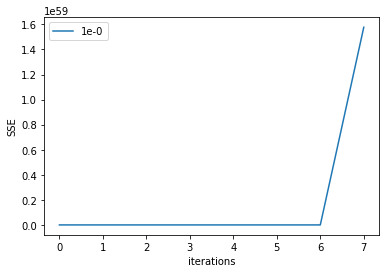

In [8]:
plt.plot(sse)
plt.legend(['1e-0'])
plt.xlabel('iterations')
plt.ylabel('SSE')